In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('migration_nz.csv')
data.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


In [3]:
data.shape

(86526, 5)

In [9]:
data['Measure'].replace("Arrivals",0,inplace=True)
data['Measure'].replace("Departures",1,inplace=True)
data['Measure'].replace("Net",2,inplace=True)

In [10]:
data['Measure'].unique()

array([0, 1, 2], dtype=int64)

In [13]:
data['Country'].unique()

array(['Oceania', 'Antarctica', 'American Samoa', 'Australia',
       'Cocos Islands', 'Cook Islands', 'Christmas Island', 'Fiji',
       'Micronesia', 'Guam', 'Kiribati', 'Marshall Islands',
       'Northern Mariana Islands', 'New Caledonia', 'Norfolk Island',
       'Nauru', 'Niue', 'New Zealand', 'French Polynesia',
       'Papua New Guinea', 'Pitcairn Island', 'Palau', 'Solomon Islands',
       'French Southern Territories', 'Tokelau', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Wallis and Futuna', 'Samoa', 'Asia', 'Afghanistan',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Brunei Darussalam',
       'Bhutan', 'China', 'Georgia', 'Hong Kong', 'Indonesia', 'India',
       'Japan', 'Kyrgyzstan', 'Cambodia', 'North Korea', 'South Korea',
       'Kazakhstan', 'Laos', 'Sri Lanka', 'Myanmar', 'Mongolia', 'Macau',
       'Maldives', 'Malaysia', 'Nepal', 'Philippines', 'Pakistan',
       'Singapore', 'Thailand', 'Tajikistan', 'Timor-Leste',
       'Turkmenistan', 'Taiwan', 'Uzbekistan', 'Vietn

In [14]:
data['CountryID'] = pd.factorize(data.Country)[0]
data['CitID'] = pd.factorize(data.Citizenship)[0]

In [15]:
data.head()

,Measure,Country,Citizenship,Year,Value,CountryID,CitID
0,0,Oceania,New Zealand Citizen,1979,11817.0,0,0
1,0,Oceania,Australian Citizen,1979,4436.0,0,1
2,0,Oceania,Total All Citizenships,1979,19965.0,0,2
3,0,Antarctica,New Zealand Citizen,1979,10.0,1,0
4,0,Antarctica,Australian Citizen,1979,0.0,1,1


In [16]:
data.isnull().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
CountryID       0
CitID           0
dtype: int64

In [17]:
data['Value'].fillna(data['Value'].median(),inplace=True)

In [19]:
#splitting x and y
X= data[['CountryID','Measure','Year','CitID']]
Y= data['Value']

In [20]:
X

,CountryID,Measure,Year,CitID
0,0,0,1979,0
1,0,0,1979,1
2,0,0,1979,2
3,1,0,1979,0
4,1,0,1979,1
...,...,...,...,...
86521,251,2,2016,1
86522,251,2,2016,2
86523,252,2,2016,0
86524,252,2,2016,1


In [21]:
Y

0        11817.0
1         4436.0
2        19965.0
3           10.0
4            0.0
          ...   
86521       80.0
86522     3177.0
86523    -1818.0
86524     3487.0
86525    70588.0
Name: Value, Length: 86526, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=9)

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
model.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=5, max_features=3, n_estimators=70, n_jobs=-1)

In [24]:
model.score(xtest,ytest)

0.7368660996862489

In [25]:
X = data[['CountryID','Measure','Year','CitID']]
Y = data['Value']
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state=9)
grouped = data.groupby(['Year']).aggregate({'Value' : 'sum'})

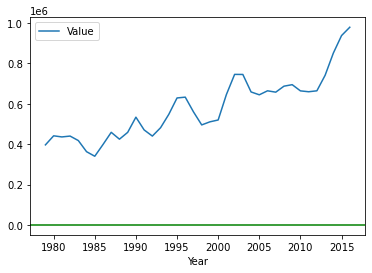

In [29]:
#Growth of migration to New-Zeland by year
grouped.plot(kind='line')
plt.axhline(0, color='g')
plt.show()

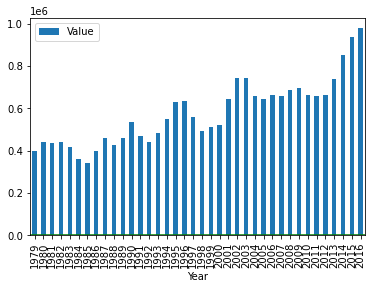

In [30]:
grouped.plot(kind='bar')
plt.axhline(0, color='g')
plt.show()

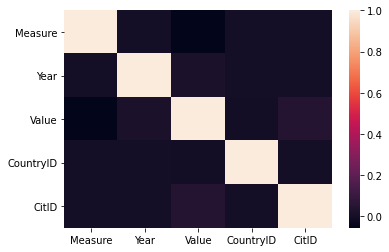

In [31]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()